In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

#Create Training

In [ ]:
number_points = 50

meanR = (20, 30) #mean_x, mean_y
covR = [[3, 0], [0, 10]] #s_x = 3, s_y = 10
dataR = np.random.multivariate_normal(meanR, covR, number_points)

meanB = (40, 40)
covB = [[10, 0], [0, 10]]
dataB = np.random.multivariate_normal(meanB, covB, number_points)

meanY = (50, 40) 
covY = [[15, 0], [0, 15]] 
dataY = np.random.multivariate_normal(meanY, covY, number_points)

testsize = 0.3
train_R, test_R, train_B, test_B, train_Y, test_Y = train_test_split(dataR, dataB, dataY, test_size=testsize, random_state=0)

train_data = np.concatenate((train_R, train_B, train_Y), axis=0)
train_data = train_data.astype(np.float32)
test_data = np.concatenate((test_R, test_B, test_Y), axis=0)
test_data = test_data.astype(np.float32)

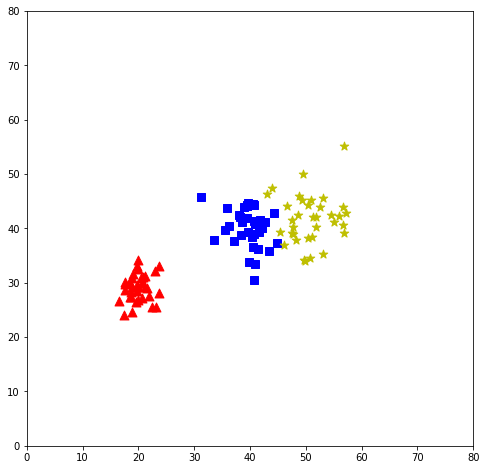

In [ ]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
fig = plt.figure(figsize=(8, 8)) #8 inch by 8 inch plot size
plt.xlim(0, 80) #x min and max
plt.ylim(0, 80) #y min and max
plt.scatter(train_R[:, 0],train_R[:, 1], 80,'r','^')
plt.scatter(train_B[:,0],train_B[:,1],80,'b','s')
plt.scatter(train_Y[:,0],train_Y[:,1],80,'y','*')
plt.show()

#Test Unknown Data

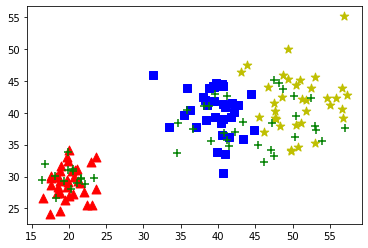

In [ ]:
plt.scatter(train_R[:, 0],train_R[:, 1], 80,'r','^')
plt.scatter(train_B[:,0],train_B[:,1],80,'b','s')
plt.scatter(train_Y[:,0],train_Y[:,1],80,'y','*')
plt.scatter(test_data[:,0],test_data[:,1],80,'g','+') #green, circle
plt.show()

In [ ]:
responses = np.concatenate((np.full(int(number_points*(1-testsize)), 0.0), np.full(int(number_points*(1-testsize)), 1.0), np.full(int(number_points*(1-testsize)), 2.0)))
responses = np.array(responses.reshape(-1, 1), dtype=np.float32)
expect_result = np.concatenate((np.full(int(number_points*testsize), 0.0), np.full(int(number_points*testsize), 1.0), np.full(int(number_points*testsize), 2.0)))
expect_result = np.array(expect_result.reshape(-1, 1), dtype=np.float32)
colorName = np.array(['Red', 'Blue', 'Yellow'])

# print("train_data shape:", train_data.shape)
# print("responses shape:", responses.shape)
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbors, dist = knn.findNearest(test_data, 5)

correct = 0
for i in range(len(test_data)):
  resultColor = colorName[results[i].astype(int)]
  neighborColors = colorName[neighbors[i].astype(int)]

  if (results[i].astype(int) == expect_result[i].astype(int)):
    correct += 1

accuracy_percent = correct / len(expect_result)
print("KNN K = 5 accuray percent is",accuracy_percent)


KNN K = 5 accuray percent is 0.9555555555555556


In [ ]:
mean_R = np.mean(train_R, axis=0)
mean_B = np.mean(train_B, axis=0)
mean_Y = np.mean(train_Y, axis=0)

centroid = [mean_R.tolist(), mean_B.tolist(), mean_Y.tolist()]
centroid = np.array(centroid, dtype=np.float32)
responses = [0, 1, 2]
responses = np.array(responses, dtype=np.float32)

print("mean of red =", centroid[0], "mean of blue =", centroid[1], "mean of yellow =", centroid[2])

mean of red = [19.931755 29.114399] mean of blue = [39.626453 40.266296] mean of yellow = [50.753605 41.74431 ]


In [ ]:
knn = cv.ml.KNearest_create()
knn.train(centroid, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbors, dist = knn.findNearest(test_data, 1)

correct = 0
for i in range(len(test_data)):
  resultColor = colorName[results[i].astype(int)]
  neighborColors = colorName[neighbors[i].astype(int)]

  if (results[i].astype(int) == expect_result[i].astype(int)):
    correct += 1

accuracy_percent = correct / len(expect_result)
print("Minimum distance classifier accuray percent is",accuracy_percent)

Minimum distance classifier accuray percent is 0.9777777777777777
